## Problem 1

In [123]:
# Import packages
import numpy as np
from numpy import linalg as la
from matplotlib import pyplot as plt

In [124]:
def jacobi(A, b, tol=0.01, maxiters=100):
    """Implements the Jacobi iterative solver method"""
    x_old = np.random.random(len(b))
    D = np.diag(np.diag(A))
    D_inv = la.inv(D)
    x_new = x_old + np.dot(D_inv, b-np.dot(A,x_old))
    iterations = 1
    error = np.inf
    while error > tol and iterations < maxiters:
        x_old = x_new
        x_new = x_old + np.dot(D_inv, b-np.dot(A,x_old))
        error = la.norm(x_old-x_new)
        iterations += 1
    print("Converged after " + str(iterations) + " iterations")
    return x_new

In [125]:
def diag_dom(n, num_entries=None):
    """Generate a strictly diagonally dominant (n, n) matrix.
    Parameters:
    n (int): The dimension of the system.
    num_entries (int): The number of nonzero values.
    Defaults to n^(3/2)-n.
    Returns:
    A ((n,n) ndarray): A (n, n) strictly diagonally dominant matrix.
    """
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A

In [126]:
#Test the function

A = diag_dom(3)
b = np.random.random(3)
print(A)

[[ 1.  0.  0.]
 [ 0.  3.  0.]
 [ 0.  0.  1.]]


In [127]:
jacobi(A, b)

Converged after 2 iterations


array([ 0.10012771,  0.03270133,  0.62663934])

In [128]:
np.allclose(np.dot(A,jacobi(A,b)),b)

Converged after 2 iterations


True

## Problem 2

In [129]:
def jacobi_plot(A, b, plot=False, tol=1e-15, maxiters=100):
    x_old = np.random.random(len(b))
    D = np.diag(np.diag(A))
    D_inv = la.inv(D)
    x_new = x_old + np.dot(D_inv, b-np.dot(A,x_old))
    iterations = 1
    error = la.norm(x_old-x_new)
    errors =[error]
    while error > tol and iterations < maxiters:
        x_old = x_new
        x_new = x_old + np.dot(D_inv, b-np.dot(A,x_old))
        error = la.norm(x_old-x_new)
        if plot == True:
            errors.append(error)
        iterations += 1
    if plot == True:
        iterate = np.linspace(1,len(errors),len(errors))
        plt.semilogy(iterate, errors)
        plt.show()
    print("Converged after " + str(iterations) + " iterations")
    return x_new

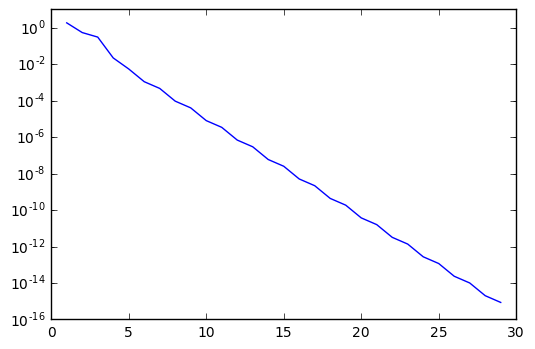

Converged after 29 iterations


array([ 0.17223581,  0.06007131, -0.04959586,  0.07949034, -0.15987044,
        0.36633636,  0.13014424,  0.22290133])

In [130]:
A = diag_dom(8)
b = np.random.random(8)
jacobi_plot(A,b,plot=True)

In [131]:
np.allclose(np.dot(A,jacobi_plot(A,b)),b)

Converged after 29 iterations


True

## Problem 3

In [144]:
def gauss(A, b, plot=False, tol=1e-15, maxiters=100):
    """Implements the Gauss-Seidel iterative method for linear systems"""
    x_old = np.random.random(len(b))
    x_new = np.zeros(len(x_old))
    for i in range(len(x_old)):
        x_new[i] = x_old[i] + (1/A[i,i])*(b[i] - np.dot((A[i,:]).T, x_old))
    iterations = 1
    error = la.norm(x_old-x_new)
    errors = [error]
    while error > tol and iterations < maxiters:
        x_old = np.copy(x_new)
        for i in range(len(x_old)):
            x_new[i] = x_old[i] + (1/A[i,i])*(b[i] - np.dot((A[i,:]).T, x_old))
        error = la.norm(x_old-x_new)
        if plot == True:
            errors.append(error)
        iterations += 1
    if plot == True:
        iterate = np.linspace(1,len(errors),len(errors))
        plt.semilogy(iterate, errors)
        plt.show()
    print("Converged after " + str(iterations) + " iterations")
    return x_new
    

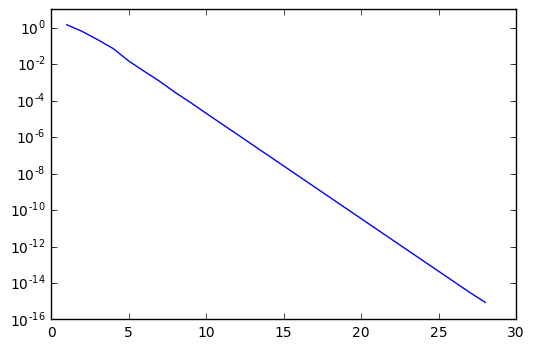

Converged after 28 iterations


array([-0.14388286,  0.58643542, -0.06664874,  0.71109577,  0.40591758,
        0.43292109,  0.3408273 ])

In [145]:
A = diag_dom(7)
b = np.random.random(7)
gauss(A,b,plot=True)

## Problem 4

In [170]:
from scipy import sparse

def gauss_sparse(A, b, tol=1e-15, maxiters=1000):
    """Implements the Gauss-Seidel iterative method for linear systems with sparse matrix A"""
    x_old = np.random.random(len(b))
    x_new = np.zeros(len(x_old))
    for i in range(len(x_old)):
        rowstart = A.indptr[i]
        rowend = A.indptr[i+1]
        Aix = A.data[rowstart:rowend] @ x_old[A.indices[rowstart:rowend]]
        x_new[i] = x_old[i] + (1/A[i,i])*(b[i] - Aix)
    iterations = 1
    error = la.norm(x_old-x_new)
    while error > tol and iterations < maxiters:
        x_old = np.copy(x_new)
        for i in range(len(x_old)):
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            Aix = A.data[rowstart:rowend] @ x_old[A.indices[rowstart:rowend]]
            x_new[i] = x_old[i] + (1/A[i,i])*(b[i] - Aix)
        error = la.norm(x_old-x_new)
        iterations += 1
    print("Converged after " + str(iterations) + " iterations")
    return x_new

In [171]:
from scipy import sparse
A = sparse.csr_matrix(diag_dom(10))
b = np.random.random(10)
x = np.array(gauss_sparse(A,b))
print(x)

Converged after 39 iterations
[ 0.1239202   0.08028232  0.08650948  0.05660014  0.19390746  0.17209761
  0.18239213 -0.11351661  0.06619946  0.26465755]


In [172]:
np.allclose(np.dot(A.toarray(),x),b)

True

## Problem 5

In [175]:
def OR_gauss_sparse(A, b, w=1, tol=1e-15, maxiters=1000):
    """Implements the Gauss-Seidel iterative method for linear systems
    and successive over-relaxation with parameter w"""
    x_old = np.random.random(len(b))
    x_new = np.zeros(len(x_old))
    for i in range(len(x_old)):
        rowstart = A.indptr[i]
        rowend = A.indptr[i+1]
        Aix = A.data[rowstart:rowend] @ x_old[A.indices[rowstart:rowend]]
        x_new[i] = x_old[i] + (w/A[i,i])*(b[i] - Aix)
    iterations = 1
    error = la.norm(x_old-x_new)
    while error > tol and iterations < maxiters:
        x_old = np.copy(x_new)
        for i in range(len(x_old)):
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            Aix = A.data[rowstart:rowend] @ x_old[A.indices[rowstart:rowend]]
            x_new[i] = x_old[i] + (w/A[i,i])*(b[i] - Aix)
        error = la.norm(x_old-x_new)
        iterations += 1
    print("Converged after " + str(iterations) + " iterations")
    return x_new
    

In [176]:
from scipy import sparse
A = sparse.csr_matrix(diag_dom(10))
b = np.random.random(10)
x = np.array(OR_gauss_sparse(A,b, w=0.5))
print(x)

Converged after 130 iterations
[-0.02227792  0.08732029 -0.08349461  0.47545387  0.05408998  0.19117557
  0.7161584   0.1076911   0.2915765  -0.09329911]


In [177]:
np.allclose(np.dot(A.toarray(),x),b)

True

## Problem 6

In [228]:
def laplace(n, w, plot=False, tol = 1e-8, maxiters=100):
    #Construct large A matrix
    A = np.eye(n**2)
    A = -4*A
    for i in range(1, n**2-1):
        A[i, i+1] = 1
        A[i, i-1] = 1
    A[0,1] = 1
    A[n**2-1, n**2-2] = 1
    for i in range(n, n**2-n):
        A[i, i+n] = 1
        A[i, i-n] = 1
    for i in range(n):
        A[i, i+n] = 1
    for i in range(n**2-n,n**2):
        A[i, i-n] = 1
    for i in range(n):
        A[i*n-1, i*n] = 0
    for i in range(n):
        A[i*n, i*n-1] = 0
    #Construct b matrix
    b1 = np.zeros(n)
    b1[0] = -100
    b1[n-1] = -100
    b = np.tile(b1,n)
    sA = sparse.csr_matrix(A)
    sol = np.array(OR_gauss_sparse(sA,b, w=0.5, tol=tol, maxiters=maxiters))
    sol_reshape = np.reshape(sol,(n,n))
    if plot == True:
        x_vals = np.arange(n+1)
        y_vals = np.arange(n+1)
        plt.pcolormesh(x_vals, y_vals, sol_reshape, cmap='coolwarm')
        plt.colorbar() 
        plt.show()
    return sol_reshape
         

Converged after 200 iterations


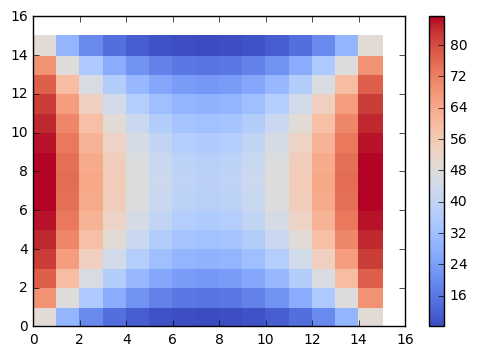

array([[ 49.5595525 ,  29.39879517,  19.79672969,  14.53358945,
         11.39797174,   9.50816069,   8.48214672,   8.155606  ,
          8.48216257,   9.50818997,  11.39801   ,  14.53363086,
         19.79676795,  29.39882445,  49.55956835],
       [ 68.87338049,  48.30548649,  35.35112228,  27.06246554,
         21.69439892,  18.31268165,  16.43474384,  15.83133102,
         16.43477485,  18.31273895,  21.69447379,  27.06254658,
         35.35119716,  48.3055438 ,  68.8734115 ],
       [ 77.69510474,  59.72925674,  46.4292597 ,  36.91163491,
         30.28743885,  25.92756298,  23.44611181,  22.63995364,
         23.44615666,  25.92764584,  30.28754711,  36.9117521 ,
         46.42936797,  59.72933961,  77.69514959],
       [ 82.27449225,  66.67677222,  54.00004051,  44.21705044,
         37.02691637,  32.12003606,  29.26601081,  28.3294144 ,
         29.26606758,  32.12014095,  37.02705342,  44.21719879,
         54.00017756,  66.67687712,  82.27454902],
       [ 84.84916713,  70.94

In [230]:
laplace(15, 0.5, plot=True, tol=1e-6, maxiters=200)

## Problem 7

In [235]:
#Modified Functions from above as helpers to return iterations

def OR_gauss_sparse_iterations(A, b, w=1, tol=1e-15, maxiters=1000):
    """Returns he number of iterations required to complete OR Gauss sparse method"""""
    x_old = np.random.random(len(b))
    x_new = np.zeros(len(x_old))
    for i in range(len(x_old)):
        rowstart = A.indptr[i]
        rowend = A.indptr[i+1]
        Aix = A.data[rowstart:rowend] @ x_old[A.indices[rowstart:rowend]]
        x_new[i] = x_old[i] + (w/A[i,i])*(b[i] - Aix)
    iterations = 1
    error = la.norm(x_old-x_new)
    while error > tol and iterations < maxiters:
        x_old = np.copy(x_new)
        for i in range(len(x_old)):
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            Aix = A.data[rowstart:rowend] @ x_old[A.indices[rowstart:rowend]]
            x_new[i] = x_old[i] + (w/A[i,i])*(b[i] - Aix)
        error = la.norm(x_old-x_new)
        iterations += 1
    print("Converged after " + str(iterations) + " iterations")
    return iterations

def laplace_iters(n, w, tol = 1e-2, maxiters=1000):
    """Returns the number of iterations required for convergence with given w"""
    #Construct large A matrix
    A = np.eye(n**2)
    A = -4*A
    for i in range(1, n**2-1):
        A[i, i+1] = 1
        A[i, i-1] = 1
    A[0,1] = 1
    A[n**2-1, n**2-2] = 1
    for i in range(n, n**2-n):
        A[i, i+n] = 1
        A[i, i-n] = 1
    for i in range(n):
        A[i, i+n] = 1
    for i in range(n**2-n,n**2):
        A[i, i-n] = 1
    for i in range(n):
        A[i*n-1, i*n] = 0
    for i in range(n):
        A[i*n, i*n-1] = 0
    #Construct b matrix
    b1 = np.zeros(n)
    b1[0] = -100
    b1[n-1] = -100
    b = np.tile(b1,n)
    sA = sparse.csr_matrix(A)
    w=w
    iterations = np.array(OR_gauss_sparse_iterations(sA,b, w=w, tol=tol, maxiters=maxiters))
    return iterations

In [238]:
import numpy as np

# Function to determine the optimal value of w
def get_w(w_vals, n):
    best_w = None
    best_iter = np.inf
    iterations = []
    for w in w_vals:
        iters = laplace_iters(n,w)
        iterations.append(iters)
        if iters < best_iter:
            best_iter = iters
            best_w = w
    return best_w, best_iter, iterations

In [239]:
w_vals = np.linspace(1.0,1.95,20)
get_w(w_vals, 20)

Converged after 611 iterations
Converged after 1000 iterations
Converged after 1000 iterations
Converged after 1000 iterations
Converged after 1000 iterations
Converged after 1000 iterations
Converged after 1000 iterations
Converged after 1000 iterations
Converged after 1000 iterations
Converged after 1000 iterations
Converged after 1000 iterations


/Users/Geoff/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in double_scalars


Converged after 973 iterations
Converged after 916 iterations
Converged after 868 iterations
Converged after 821 iterations
Converged after 786 iterations
Converged after 753 iterations
Converged after 726 iterations
Converged after 699 iterations
Converged after 675 iterations


(1.0,
 array(611),
 [array(611),
  array(1000),
  array(1000),
  array(1000),
  array(1000),
  array(1000),
  array(1000),
  array(1000),
  array(1000),
  array(1000),
  array(1000),
  array(973),
  array(916),
  array(868),
  array(821),
  array(786),
  array(753),
  array(726),
  array(699),
  array(675)])

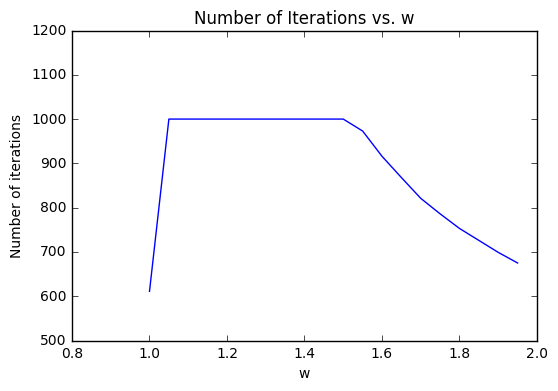

In [242]:
iterations = np.array([611,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,973,916,868,821,786,753,726,699,675])
plt.plot(w_vals,iterations)
plt.axis([0.8, 2.0, 500, 1200])
plt.title("Number of Iterations vs. w")
plt.xlabel("w")
plt.ylabel("Number of iterations")
plt.show()

Based on our values of w tested, w=1.0 resulted in the smallest number of iterations required until convergence.